This was originally a guided project that I did through the courses on dataquest.io. Here, I analyse data on police killings collected by FiveThirtyEight, and the data set can be found at https://github.com/fivethirtyeight/data/tree/master/police-killings. In the analysis, data on state populations from https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html is also included. In this project, I use Python and the pandas, numpy and matplotlib packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv('police_killings.csv', encoding = 'ISO-8859-1')
print(police_killings.columns)
print(police_killings.dtypes)
police_killings.head(10)


Index([                u'name',                  u'age',
                     u'gender',        u'raceethnicity',
                      u'month',                  u'day',
                       u'year',        u'streetaddress',
                       u'city',                u'state',
                   u'latitude',            u'longitude',
                   u'state_fp',            u'county_fp',
                   u'tract_ce',               u'geo_id',
                  u'county_id',             u'namelsad',
       u'lawenforcementagency',                u'cause',
                      u'armed',                  u'pop',
                u'share_white',          u'share_black',
             u'share_hispanic',             u'p_income',
                   u'h_income',        u'county_income',
                u'comp_income',        u'county_bucket',
                 u'nat_bucket',                  u'pov',
                      u'urate',              u'college'],
      dtype='object')
name    

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833,53596,0.388704,1,1,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068,48552,1.195996,4,4,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543,55909,1.190202,4,4,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391,38310,0.793292,2,1,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553,51667,0.862311,3,2,18.4,0.174167,0.102692


In [13]:
race_counts = police_killings['raceethnicity'].value_counts()
print(race_counts)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
dtype: int64


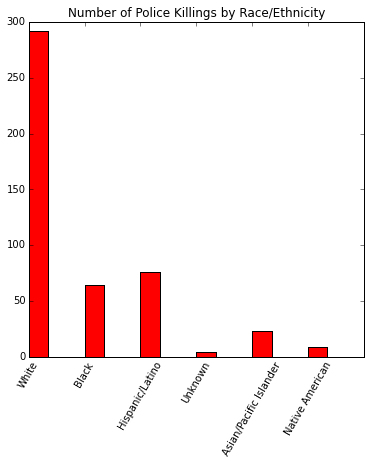

In [11]:
ind = np.arange(1, 7)
width = 0.35
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(ind, race_counts, width = 0.35, color='r')
plt.xticks(ind, ['White', 'Black', 'Hispanic/Latino', 'Unknown', 'Asian/Pacific Islander', 'Native American'], rotation = 60)
plt.title("Number of Police Killings by Race/Ethnicity")
plt.show()

We get our figures for the breakdown of the US population by race/ethnicity from https://www.census.gov/quickfacts/table/PST045215/00. We store these percentages in the list race_perc.

In [26]:
pk_race_percentages = 100.00 * race_counts/race_counts.sum()
race_perc = list([61.6, 13.3, 17.6, 0.5, 5.8, 1.2])

print(pk_race_percentages)

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
dtype: float64


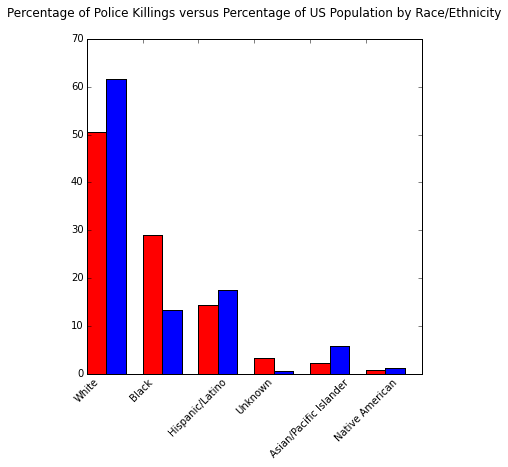

In [27]:
ind = np.arange(1, 7)
width = 0.35
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(ind, pk_race_percentages, width, color='r')
ax.bar(ind+width, race_perc, width, color='b')
plt.xticks(ind, ['White', 'Black', 'Hispanic/Latino', 'Unknown', 'Asian/Pacific Islander', 'Native American'], rotation = 45)
plt.title("Percentage of Police Killings versus Percentage of US Population by Race/Ethnicity ", y = 1.05)
plt.show()

As is clear in the above plot, black people are very much overrepresented in the police killings data, while whites are somewhat underrepresented. 

Now let's turn our attention to police killings by income. The p_income column of the police_killings dataset is the median personal income by census area. Unfortunately, there is some missing data in this column, represented by the entry '-'. To analyse the income distribution, we will remove these entries. 

In [28]:
income = police_killings['p_income'][police_killings['p_income'] != '-']

In [29]:
income = income.astype(float)

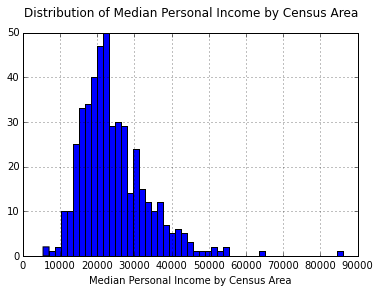

In [32]:
income.hist(bins = 50)
plt.title("Distribution of Median Personal Income by Census Area", y = 1.05)
plt.xlabel("Median Personal Income by Census Area")
plt.show()

In [33]:
income.mean()

24308.96559139785

In [34]:
income.median()

22348.0

In [35]:
income.std()

9021.77284376542

In [38]:
((income < (24308.965591397849 + 9021.7728437654187)) & (income > (24308.965591397849 - 9021.7728437654187))).sum()

348

In [39]:
len(income)

465

In [40]:
348.0/465.0

0.7483870967741936

In [41]:
24308.965591397849 - 9021.7728437654187

15287.19274763243

In [42]:
24308.965591397849 + 9021.7728437654187

33330.738435163265

In [44]:
((income < (24308.965591397849 + 2 * 9021.7728437654187)) & (income > (24308.965591397849 - 2 * 9021.7728437654187))).sum()

445

In [45]:
445.0/465.0

0.956989247311828

In [46]:
24308.965591397849 - 2 * 9021.7728437654187

6265.419903867012

In [47]:
24308.965591397849 + 2 * 9021.7728437654187

42352.51127892869

The histogram clearly shows a peak at around $25,000 USD in income, which is well below the median US income of $51,939 USD (in 2013). In fact, one can quickly check that 74.8 percent of police killings took place in areas with median personal income between $15,287 and $33331, while 95.7 percent of killings took place in areas with median personal income between $6,265 and $42,353. This clearly shows that the overwhelming majority of police killings took place in low to low-middle income areas. 